<a href="https://colab.research.google.com/github/Rishikakumari2000/Python-for-everybody/blob/main/Pan_card_Tempering_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM
To detect PAN card tampering using **Computer Vision**

We will compare the structural similarity between the original PAN card and PAN card uploaded by the user.

In [2]:
!pip install image


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 52.5 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19483 sha256=d9eafa2017345713a3da21a9485f0f847d60b9201c0a0757006e15100649f326
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


In [5]:
from skimage.metrics import structural_similarity   #To score similarity between and true and fake
import cv2
import requests # we going to obtain image from different url
from PIL import Image   #for downloading and visualising image
import imutils #for grabbing contours

In [6]:
# creating a directory in which images folder is created where images are stored
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

In [8]:
# open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream =True).raw)
temper = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream =True).raw)

In [10]:
print('original image format: ', original.format)
print('tempered image format: ', temper.format)
print('original image size: ', original.size)
print('tempered image size: ', temper.size)


original image format:  JPEG
tempered image format:  PNG
original image size:  (1200, 800)
tempered image size:  (282, 179)


In [12]:
# Resize
original = original.resize((250,160))
temper = temper.resize((250,160))
print(original.size) # check
# save
original.save('pan_card_tempering/image/original.png')
temper.save('pan_card_tempering/image/temper.png')

(250, 160)


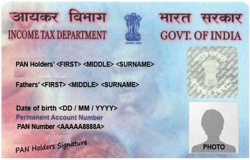

In [13]:
#visualisation
original

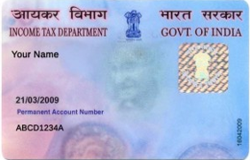

In [14]:
temper

In [15]:
#load two input images
original =cv2.imread('pan_card_tempering/image/original.png')
temper =cv2.imread('pan_card_tempering/image/temper.png')

convert images to greyscale using openCV because in image processing many application doesn't help us identifying important edges of coloured image also coloured imagehas three channels RGB and greyscale has 1 that makes it less complex.

In [17]:
original_grey = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
temper_grey = cv2.cvtColor(temper,cv2.COLOR_BGR2GRAY)

In [19]:
# evaluate structural similarity Index(ssim) and difference image returned
(score,diff) = structural_similarity(original_grey, temper_grey, full = True)
diff = (diff*225).astype('uint8') #to normalise
print("Structural similarity(SSIM): ", format(score))

Structural similarity(SSIM):  0.31678790332739426


low SSIM score hence images are not similar

In [24]:
# calculating threshold and contour
thresh = cv2.threshold(diff, 0 ,256, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]# applies adaptive threshold to image and store in form of array, converts greyscal to binary
cnts =cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)# contour imp for shape analysis and recognistion
cnts = imutils.grab_contours(cnts)

In [25]:
# loop over contour
for c in cnts:
  (x,y,w,h) =cv2.boundingRect(c)
  # creating bounding rectangle
  cv2.rectangle(original, (x,y),(x+w,y+h), (0,0,255,2))
  cv2.rectangle(temper, (x,y),(x+w,y+h), (0,0,255,2))

original image


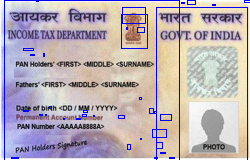

In [27]:
print('original image')
Image.fromarray(original)

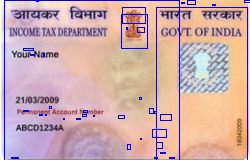

In [28]:
Image.fromarray(temper)

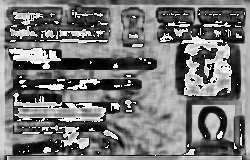

In [30]:
Image.fromarray(diff) # black signify difference

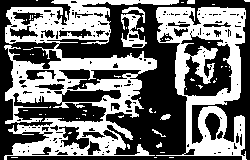

In [31]:
Image.fromarray(thresh) # white denote threshold difference

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
As, our SSIM is ~31.2% we can say that the image user rovided is fake or tampered.,
Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.
